In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading and Exploring the data

In [52]:
data = pd.read_csv("../WineQT.csv",sep=",")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [53]:
#getting a list of features of the data.
feature_list = data.columns[:-1].values # data.columns return an array of column names of the given dataframe.
label = [data.columns[-1]] # The last column name
print("Feature List: ", feature_list)
print("Label: ", label)

Feature List:  ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']
Label:  ['Id']


In [54]:
# Some statistics about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


We can see that  there are 1599 rows and 12 columns in the dataset. all of them are of type float64 except the quality column.

In [55]:
# Detailed statistics
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


describe() method returns a dataframe with count, mean, standard deviation, 

In [56]:
# check how many values are there for each quality
data['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

Text(0, 0.5, 'Count')

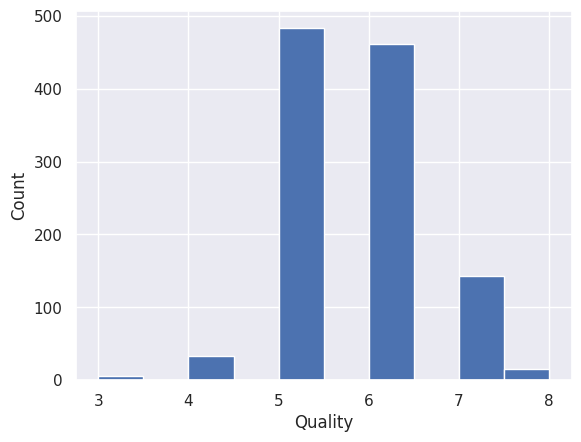

In [57]:
# plot the quality distribution
sns.set()
data.quality.hist()
plt.xlabel('Quality')
plt.ylabel('Count')

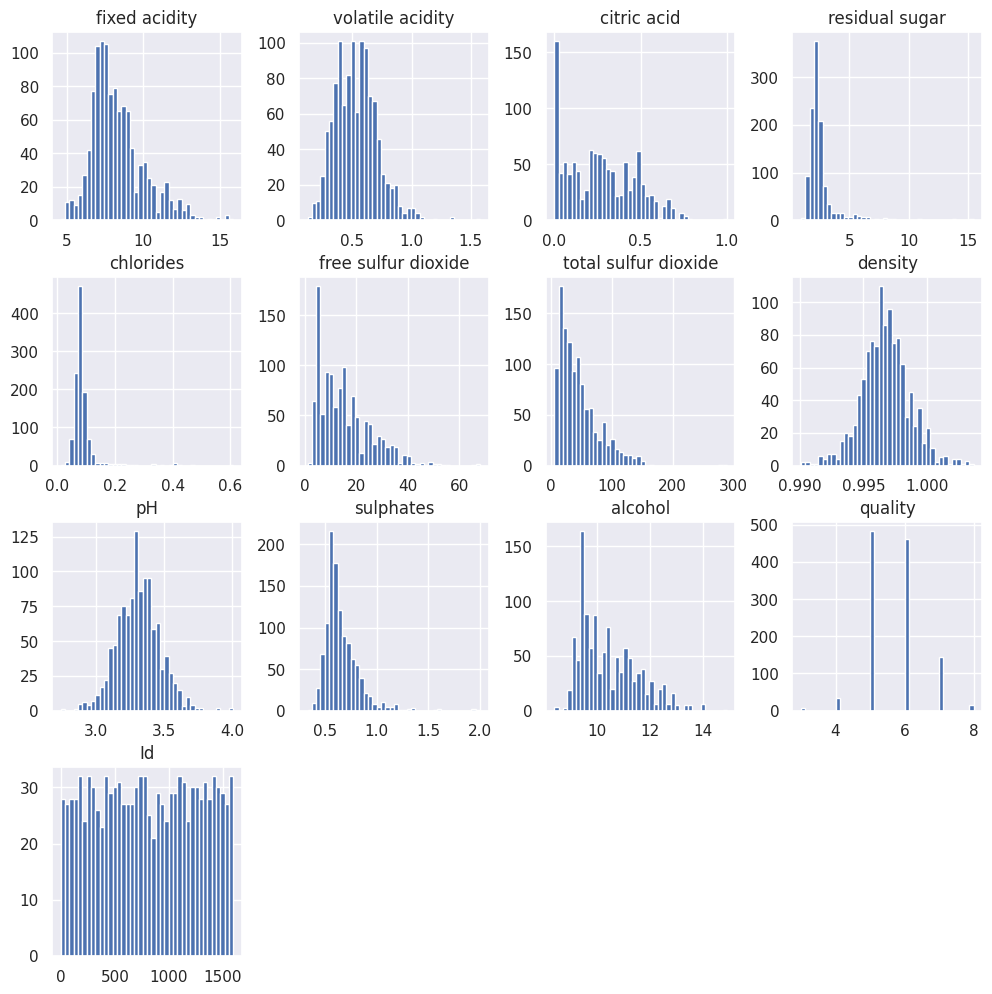

In [58]:
# plotting all other distribution histograms
data.hist(figsize=(12,12),bins=40)
plt.show()

# Test Train Split

In [59]:
# Creating a function by hand to split the data into train and test sets
def split_train_test(data,test_ratio):
    # set the random seed
    np.random.seed(42)
    # shuffle the indices
    shuffled_indices = np.random.permutation(len(data))
    # calculate the test set size
    test_set_size = int(len(data)*test_ratio)
    # get the test indices
    test_indices = shuffled_indices[:test_set_size]
    # get the train indices
    train_indices = shuffled_indices[test_set_size:]
    # return the train and test sets
    return data.iloc[train_indices],data.iloc[test_indices]
train_set, test_set = split_train_test(data,0.2)
print("value counts in test set: \n",test_set.quality.value_counts()/len(test_set))
print("value counts in train set: \n",train_set.quality.value_counts()/len(train_set))
print("value counts in original data: \n",data.quality.value_counts()/len(data))

value counts in test set: 
 quality
6    0.429825
5    0.421053
7    0.114035
4    0.026316
8    0.008772
Name: count, dtype: float64
value counts in train set: 
 quality
5    0.422951
6    0.397814
7    0.127869
4    0.029508
8    0.015301
3    0.006557
Name: count, dtype: float64
value counts in original data: 
 quality
5    0.422572
6    0.404199
7    0.125109
4    0.028871
8    0.013998
3    0.005249
Name: count, dtype: float64


## Explanation
Though above spilt distribution is not too bad, but it is not the best way to split the data.

In [60]:
#usign sklearn to split the data
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data,test_size=0.2,random_state=42)
print("value counts in test set: \n",test_set.quality.value_counts()/len(test_set))
print("value counts in train set: \n",train_set.quality.value_counts()/len(train_set))
print("value counts in original data: \n",data.quality.value_counts()/len(data))

value counts in test set: 
 quality
6    0.432314
5    0.419214
7    0.113537
4    0.026201
8    0.008734
Name: count, dtype: float64
value counts in train set: 
 quality
5    0.423414
6    0.397155
7    0.128009
4    0.029540
8    0.015317
3    0.006565
Name: count, dtype: float64
value counts in original data: 
 quality
5    0.422572
6    0.404199
7    0.125109
4    0.028871
8    0.013998
3    0.005249
Name: count, dtype: float64


# Explanation
The above split is better than the previous one, but still it is not the best way to split the data.

Text(0, 0.5, 'Count')

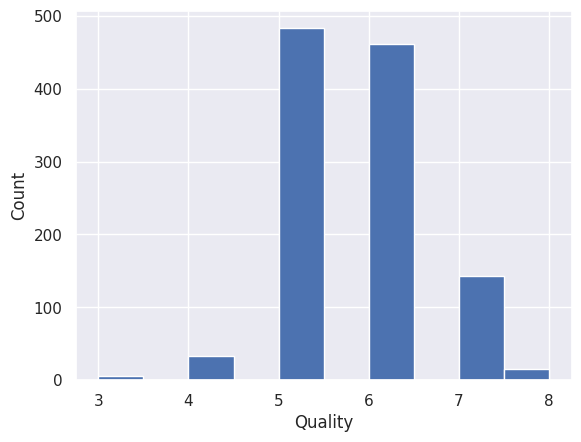

In [61]:
sns.set()
data.quality.hist()
plt.xlabel('Quality')
plt.ylabel('Count')

# Explanation
We can see that the data is skewed towards the quality 5 and 6. So we need to do stratified sampling to get a good test set.

In [62]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(data,data['quality']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
print(strat_test_set.quality.value_counts()/len(strat_test_set))
print(strat_train_set.quality.value_counts()/len(strat_train_set))
print(data.quality.value_counts()/len(data))

quality
5    0.423581
6    0.401747
7    0.126638
4    0.030568
8    0.013100
3    0.004367
Name: count, dtype: float64
quality
5    0.422319
6    0.404814
7    0.124726
4    0.028446
8    0.014223
3    0.005470
Name: count, dtype: float64
quality
5    0.422572
6    0.404199
7    0.125109
4    0.028871
8    0.013998
3    0.005249
Name: count, dtype: float64


## Explanation
Now we can see that the test set has the same distribution as the original data.

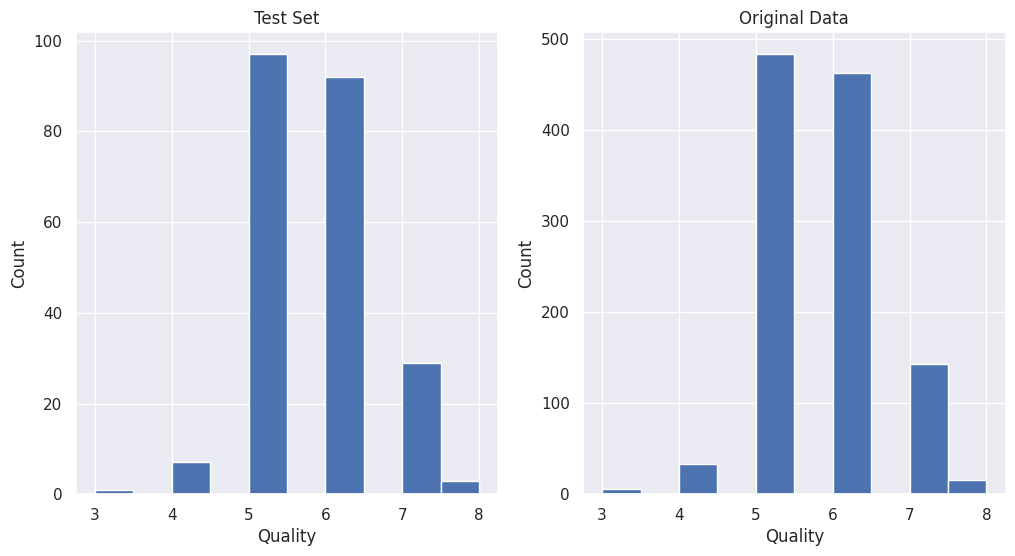

In [63]:
# plot the quality distribution in the test set and the original data
fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].hist(strat_test_set['quality'])
ax[0].set_xlabel('Quality')
ax[0].set_ylabel('Count')
ax[0].set_title('Test Set')
ax[1].hist(data['quality'])
ax[1].set_xlabel('Quality')
ax[1].set_ylabel('Count')
ax[1].set_title('Original Data')
plt.show()

In [64]:
stratified_dist = strat_test_set.quality.value_counts() / len(strat_test_set)
original_dist = data.quality.value_counts()/len(data)
dist_comp = pd.DataFrame({'Original':original_dist,'Stratified':stratified_dist, 'Error': stratified_dist - original_dist})
dist_comp

,Original,Stratified,Error
quality,,,
5,0.422572,0.423581,0.001009
6,0.404199,0.401747,-0.002453
7,0.125109,0.126638,0.001528
4,0.028871,0.030568,0.001696
8,0.013998,0.013100,-0.000898
3,0.005249,0.004367,-0.000883


# Data Visualization

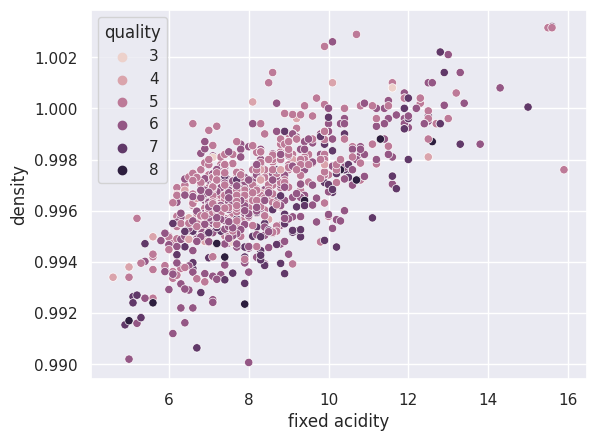

In [65]:
exploration_set = strat_train_set.copy()
sns.scatterplot(x='fixed acidity',y='density',hue='quality',data=exploration_set)
plt.show()

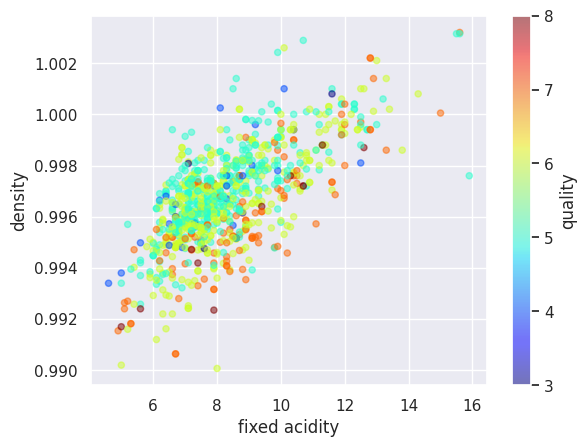

In [66]:
exploration_set.plot(kind='scatter',x='fixed acidity',y='density',alpha=0.5,c='quality', cmap=plt.get_cmap('jet'),colorbar=True)
plt.show()

In [67]:
corr_matrix = exploration_set.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.482011
sulphates               0.245382
citric acid             0.232665
fixed acidity           0.114196
Id                      0.093820
residual sugar          0.040086
free sulfur dioxide    -0.045641
pH                     -0.066657
chlorides              -0.128679
total sulfur dioxide   -0.156308
density                -0.174787
volatile acidity       -0.402429
Name: quality, dtype: float64

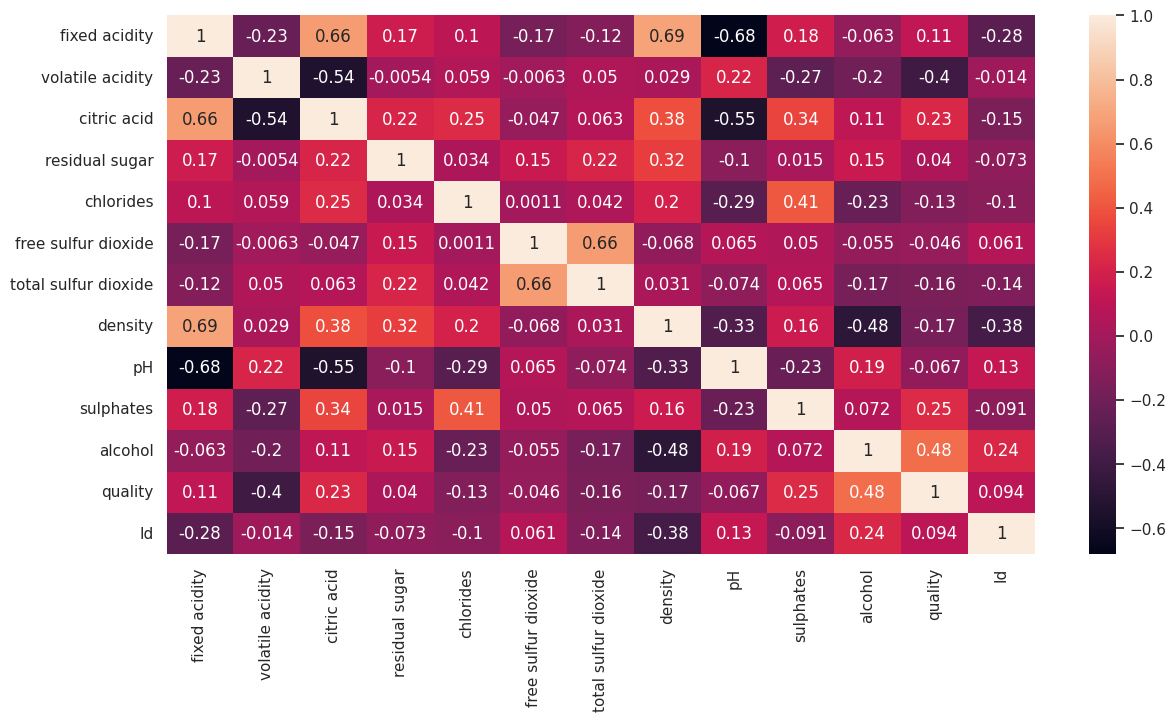

In [68]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix,annot=True)
plt.show()

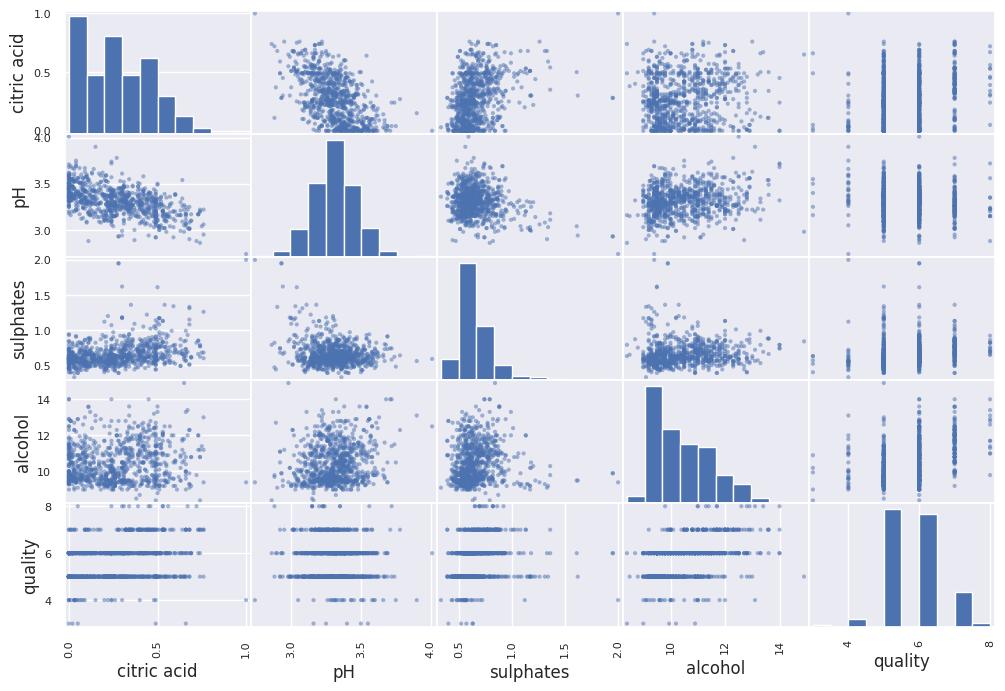

In [69]:
from pandas.plotting import scatter_matrix
attributes = ['citric acid', 'pH', 'sulphates', 'alcohol', 'quality']
scatter_matrix(exploration_set[attributes],figsize=(12,8))
plt.show()

# Data Preprocessing

In [70]:
# Seperating the features and the labels
wine_features = strat_train_set.drop('quality',axis=1)
wine_labels = strat_train_set['quality'].copy()


In [71]:
# Data Cleaning
# Checking Null values
wine_features.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Id                      0
dtype: int64

## Explanation
There are no null values in the data.
If there were any we could have removed it using dropna() method or we could have filled it with some value using fillna() method.
There is a better way to do this using SimpleImputer class from sklearn.

In [72]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(wine_features)

SimpleImputer(strategy='median')

In [73]:
imputer_stats_comp = pd.DataFrame({'Imputer Median':imputer.statistics_,'Orignial Median':wine_features.median().values})
imputer_stats_comp

,Imputer Median,Orignial Median
0,7.9000,7.9000
1,0.5200,0.5200
2,0.2550,0.2550
3,2.2000,2.2000
4,0.0790,0.0790
5,13.0000,13.0000
6,37.0000,37.0000
7,0.9967,0.9967
8,3.3100,3.3100
9,0.6200,0.6200


In [74]:
tr_features = imputer.transform(wine_features)
wine_features_tr = pd.DataFrame(tr_features,columns=wine_features.columns)
wine_features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
819,8.3,0.60,0.25,2.2,0.118,9.0,38.0,0.99616,3.15,0.53,9.8,1155
357,10.5,0.24,0.42,1.8,0.077,6.0,22.0,0.99760,3.21,1.05,10.8,504
385,9.5,0.46,0.49,6.3,0.064,5.0,17.0,0.99880,3.21,0.73,11.0,541
1057,5.6,0.62,0.03,1.5,0.080,6.0,13.0,0.99498,3.66,0.62,10.1,1480
161,8.9,0.59,0.50,2.0,0.337,27.0,81.0,0.99640,3.04,1.61,9.5,226


## Handling Categorical Data and Text Attributes
There are no categorical data in the data set, but if there were any we could have used OrdinalEncoder or OneHotEncoder class from sklearn to encode the categorical data.
```python
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
cat_data = dataset[['column1','column2']]
cat_data_encoded = ordinal_encoder.fit_transform(cat_data)
```
```
python
from sklearn.preprocessing import OneHotEncoder
cat_data = dataset[['column1','column2']]
cat_encoder = OneHotEncoder()
cat_data_1hot = cat_encoder.fit_transform(cat_data) # returns a sparse matrix
cat_data_1hot.toarray() # returns a dense matrix
cat_encoder.categories_ # returns the categories
```

# Feature Scaling
Most of the machine learning algorithms don't perform well when the input numerical attributes have very different scales. So we need to scale the features.
There are two ways to do this:
1. Min-Max Scaling (Normalization)
2. Standardization
```python
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(data)
```
```python
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(data)
```

# Transformation Pipelines
Sklearn provides the Pipeline class to help with such sequences of transformations.

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
transformation_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])
wine_features_tr = transformation_pipeline.fit_transform(wine_features)
wine_features_tr

array([[-0.01210056,  0.38868446, -0.10911257, ..., -0.73117094,
        -0.60847324,  0.75382352],
       [ 1.24861507, -1.62648508,  0.76121141, ...,  2.26306416,
         0.33096011, -0.64781065],
       [ 0.67556251, -0.39499258,  1.1195801 , ...,  0.42045794,
         0.51884678, -0.56814787],
       ...,
       [ 0.73286776, -0.61890031,  0.40284271, ...,  0.01738783,
         0.61279011,  0.74951742],
       [-0.64245838, -0.64688878,  0.45403824, ..., -0.09777506,
        -1.17213325, -1.43797921],
       [-0.24132159, -0.00315406, -0.1603081 , ..., -0.6735895 ,
        -0.98424658, -1.06334888]])

## Mixed Data Transformation
There are no mixed data in the data set, but if there were any we could have used ColumnTransformer class from sklearn to transform the mixed data.
```python
from sklearn.compose import ColumnTransformer
num_attribs = ['column1','column2']
cat_attribs = ['column3','column4']
full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs)
])
wine_features_tr = full_pipeline.fit_transform(wine_features)
```

# Selecting and Training a Model

In [76]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(wine_features_tr,wine_labels)

LinearRegression()

In [77]:
from sklearn.metrics import mean_squared_error as mse # linear regression model evaluation
wine_predictions = lin_reg.predict(wine_features_tr)
mean_squared_error = mse(wine_labels,wine_predictions)
mean_squared_error

0.40938322363170765

In [78]:
# Evaluating on the test set
wine_features_test = strat_test_set.drop('quality',axis=1)
wine_labels_test = strat_test_set['quality'].copy()
wine_features_test_tr = transformation_pipeline.transform(wine_features_test)
wine_predictions_test = lin_reg.predict(wine_features_test_tr)
mean_squared_error_test = mse(wine_labels_test,wine_predictions_test)
mean_squared_error_test

0.39406665311091815

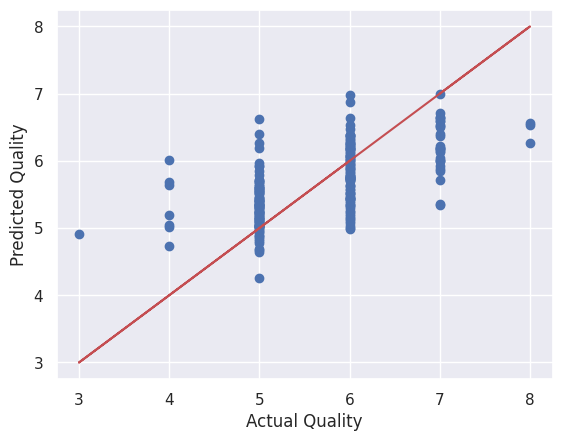

In [79]:
plt.scatter(wine_labels_test,wine_predictions_test)
plt.plot(wine_labels_test,wine_labels_test,'r')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.show()

## Explanation
The model is underfitting the data. We can try a more complex model or we can add more features.

In [80]:
# Trying a more complex model - Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine_features_tr,wine_labels)
wine_predictions = tree_reg.predict(wine_features_tr)
mean_squared_error = mse(wine_labels,wine_predictions)
mean_squared_error

0.0

## Explanation
The model is overfitting the data.

In [81]:
dt_win_pred = tree_reg.predict(wine_features_test_tr)
mean_squared_error_test = mse(wine_labels_test,dt_win_pred)
mean_squared_error_test

0.611353711790393

## Explanation
The error on the test set is much higher than the error on the training set. This confirms that the model is overfitting the data.

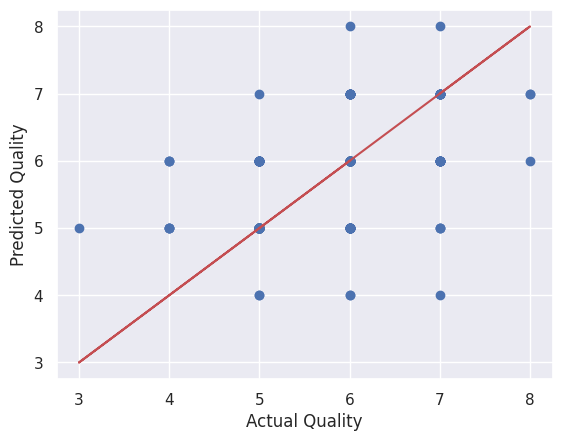

In [82]:
plt.scatter(wine_labels_test,dt_win_pred)
plt.plot(wine_labels_test,wine_labels_test,'r')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.show()

## Explanation
As we can see, predications are all over the place. This is because the model is overfitting the data.

## Cross Validation

In [83]:
def display_scores(scores):
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('Standard Deviation:',scores.std())

In [84]:
#using cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg,wine_features_tr,wine_labels,scoring='neg_mean_squared_error',cv=10)
display_scores(-scores)


Scores: [0.32917185 0.34327384 0.4467926  0.38949604 0.5052457  0.51128511
 0.43844748 0.41601636 0.40861265 0.46335726]
Mean: 0.4251698879730073
Standard Deviation: 0.05786468345798634


In [85]:
# Decision Tree Regressor using cross validation
scores = cross_val_score(tree_reg,wine_features_tr,wine_labels,scoring='neg_mean_squared_error',cv=10)
display_scores(-scores)

Scores: [0.79347826 0.44565217 0.55434783 0.54347826 0.64835165 0.57142857
 0.61538462 0.72527473 0.83516484 0.78021978]
Mean: 0.6512780697563306
Standard Deviation: 0.12128801793150865


In [86]:
# Random Forest Regressor using cross validation
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(wine_features_tr,wine_labels)
scores = cross_val_score(forest_reg,wine_features_tr,wine_labels,scoring='neg_mean_squared_error',cv=10)
display_scores(-scores)

Scores: [0.2523587  0.27995326 0.4187087  0.31195543 0.44161978 0.42218022
 0.33848571 0.39346593 0.36522637 0.37722198]
Mean: 0.3601176086956522
Standard Deviation: 0.0601530520565557


In [87]:
quality_prediction = forest_reg.predict(wine_features_test_tr)
mean_squared_error_test = mse(wine_labels_test, quality_prediction)
mean_squared_error_test

0.3485593886462882

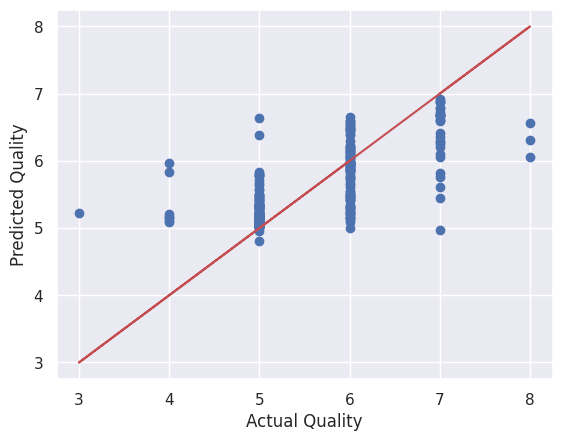

In [88]:
plt.scatter(wine_labels_test, quality_prediction)
plt.plot(wine_labels_test,wine_labels_test,'r')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.show()

## Explanation
Random Forest Regressor is the best model so far. It has least error on the test set.

In [89]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(wine_features_tr,wine_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [90]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [91]:
cv_results = grid_search.cv_results_
for mean_score,params in zip(cv_results['mean_test_score'],cv_results['params']):
    print(-mean_score,params)

0.5085370003402789 {'max_features': 2, 'n_estimators': 3}
0.39868900498408694 {'max_features': 2, 'n_estimators': 10}
0.3736612889235841 {'max_features': 2, 'n_estimators': 30}
0.47255349386496925 {'max_features': 4, 'n_estimators': 3}
0.40224157809403716 {'max_features': 4, 'n_estimators': 10}
0.3771174563141776 {'max_features': 4, 'n_estimators': 30}
0.49805774068069153 {'max_features': 6, 'n_estimators': 3}
0.4092415180447967 {'max_features': 6, 'n_estimators': 10}
0.3775340379110871 {'max_features': 6, 'n_estimators': 30}
0.48911774321610385 {'max_features': 8, 'n_estimators': 3}
0.4059191136732121 {'max_features': 8, 'n_estimators': 10}
0.3709822587855375 {'max_features': 8, 'n_estimators': 30}
0.5223970322330977 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.4035828979763406 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4725975299745791 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.39990416141235813 {'bootstrap': False, 'max_features':

In [94]:
feature_importance = grid_search.best_estimator_.feature_importances_
best_estimator = grid_search.best_estimator_
sorted(zip(feature_importance,wine_features.columns),reverse=True)

[(0.2522613425430599, 'alcohol'),
 (0.14013965662686395, 'volatile acidity'),
 (0.13627853159713926, 'sulphates'),
 (0.06761671438519957, 'total sulfur dioxide'),
 (0.05800829861241162, 'pH'),
 (0.05745377496206906, 'Id'),
 (0.055217172197598606, 'chlorides'),
 (0.053356839225944655, 'density'),
 (0.05236377266727763, 'fixed acidity'),
 (0.04838250383149261, 'citric acid'),
 (0.04077569715248112, 'free sulfur dioxide'),
 (0.038145696198461795, 'residual sugar')]

In [96]:
final_model = grid_search.best_estimator_
quality_test_predications = final_model.predict(wine_features_test_tr)
final_mse = mse(wine_labels_test,quality_test_predications)
final_mse

0.3427899078117418

In [97]:
from scipy import stats
confidence = 0.95
squared_errors = (quality_test_predications - wine_labels_test)**2
stats.t.interval(confidence,len(squared_errors)-1,loc=squared_errors.mean(),scale=stats.sem(squared_errors))

(0.253265423641495, 0.43231439198198857)

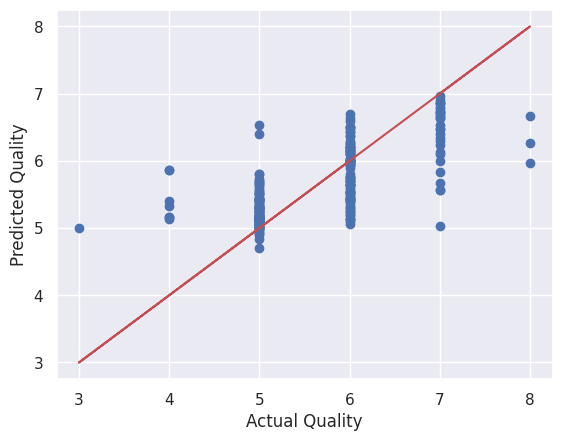

In [98]:
plt.scatter(wine_labels_test,quality_test_predications)
plt.plot(wine_labels_test,wine_labels_test,'r')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.show()

# Randomized search CV

In [99]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(forest_reg,param_grid,cv=10,scoring='neg_mean_squared_error',return_train_score=True)
random_search.fit(wine_features_tr,wine_labels)


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [100]:
random_search.best_params_

{'n_estimators': 30, 'max_features': 8}

In [101]:
random_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [103]:
-random_search.best_score_

0.36284879492488187

## Explanation
Randomized search CV is a faster way to find the best hyperparameters. It is faster than GridSearchCV because it does not try all the combinations and the score is reasonably close to the score of GridSearchCV.

In [104]:
final_model = random_search.best_estimator_
quality_test_predications = final_model.predict(wine_features_test_tr)
final_mse = mse(wine_labels_test,quality_test_predications)
final_mse

0.3502037845705968

In [105]:
from scipy import stats
confidence = 0.95
squared_errors = (quality_test_predications - wine_labels_test)**2
stats.t.interval(confidence,len(squared_errors)-1,loc=squared_errors.mean(),scale=stats.sem(squared_errors))

(0.2559608862175946, 0.444446682923599)